In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [2]:
data=pd.read_csv("DataAnalytics.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Administrador          5865 non-null   object 
 1   Usuario                5865 non-null   object 
 2   botón correcto         5103 non-null   float64
 3   tiempo de interacción  5103 non-null   float64
 4   mini juego             5709 non-null   object 
 5   número de interacción  5103 non-null   float64
 6   color presionado       5103 non-null   object 
 7   dificultad             5865 non-null   object 
 8   fecha                  5865 non-null   object 
 9   Juego                  5865 non-null   object 
 10  auto push              5103 non-null   float64
 11  tiempo de lección      5688 non-null   float64
 12  tiempo de sesión       5259 non-null   float64
dtypes: float64(6), object(7)
memory usage: 595.8+ KB


# Reemplazar Valores Nulos

In [3]:
data_cuanti=data.select_dtypes(include=["float64","int64","float","int"])
data_cuali=data.select_dtypes(include=["object","datetime","category"])

cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))
cualis_bfill=data_cuali.fillna(method="bfill")
cualis_ffill=data_cuanti.fillna(method="ffill")

data_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data_sin_nulos

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_8788\3835835612.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_8788\3835835612.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuanti.fillna(method="ffill")


,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,1.0,5.399169,1.0,0.0,0.000000,0.000000
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,0.0,1.283400,2.0,0.0,0.000000,0.000000
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,1.0,2.700226,3.0,0.0,0.000000,0.000000
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,0.0,3.050262,4.0,0.0,0.000000,0.000000
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,0.0,4.750256,5.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1.0,7.099429,4.0,0.0,7.461668,332.240000
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,0.0,2.135419,1.0,0.0,0.000000,0.000000
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,0.0,2.135419,1.0,0.0,2.271806,0.000000
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,0.0,2.135419,1.0,0.0,2.271806,6.478299


In [4]:
nulos=data_sin_nulos.isnull().sum().sum()
nulos

0

# Eliminar Outliers

In [5]:
cuantitativas=data.select_dtypes(include=["float64","int64","float","int"])
cualitativas=data.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,1.0,5.399169,1.0,0.0,0.000000,0.000000
1,nicolas,nicolas,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,1.283400,2.0,0.0,0.000000,0.000000
2,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,1.0,2.700226,3.0,0.0,0.000000,0.000000
3,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,3.050262,4.0,0.0,0.000000,0.000000
4,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,4.750256,5.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,ALEIDA,ESMERALDA,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,0.5,10.000000,13.3,0.0,6.300000,332.240000
5861,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,2.135419,1.0,0.0,0.000000,0.000000
5862,ALEIDA,JOSE JAVIER,Asteroides,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,0.5,10.000000,13.3,0.0,2.271806,12.400000
5863,ALEIDA,JOSE JAVIER,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,0.5,10.000000,13.3,0.0,6.300000,6.478299


# Análisis Univariado

In [6]:
def analisis_univariado(variable):
    tabla=freq_tbl(data[variable])
    tabla_cfiltro= tabla.drop(['percentage','cumulative_perc'], axis=1)
    tabla_filtrada= tabla_cfiltro[tabla_cfiltro['frequency']>1]
    filtrada_index= tabla_filtrada.set_index(variable)
    return(filtrada_index)

Text(0.5, 1.0, 'Administradores Con Más Tiempo')

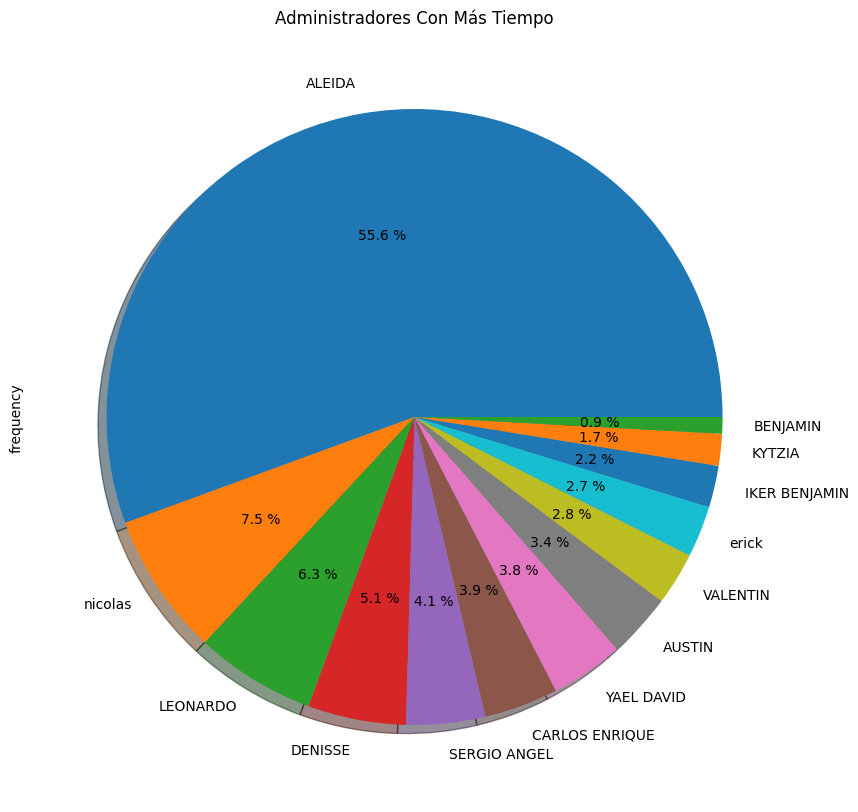

In [7]:
#Administrador:
filtrada_index=analisis_univariado("Administrador")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Administradores Con Más Tiempo')

Text(0, 0.5, 'Frecuencia')

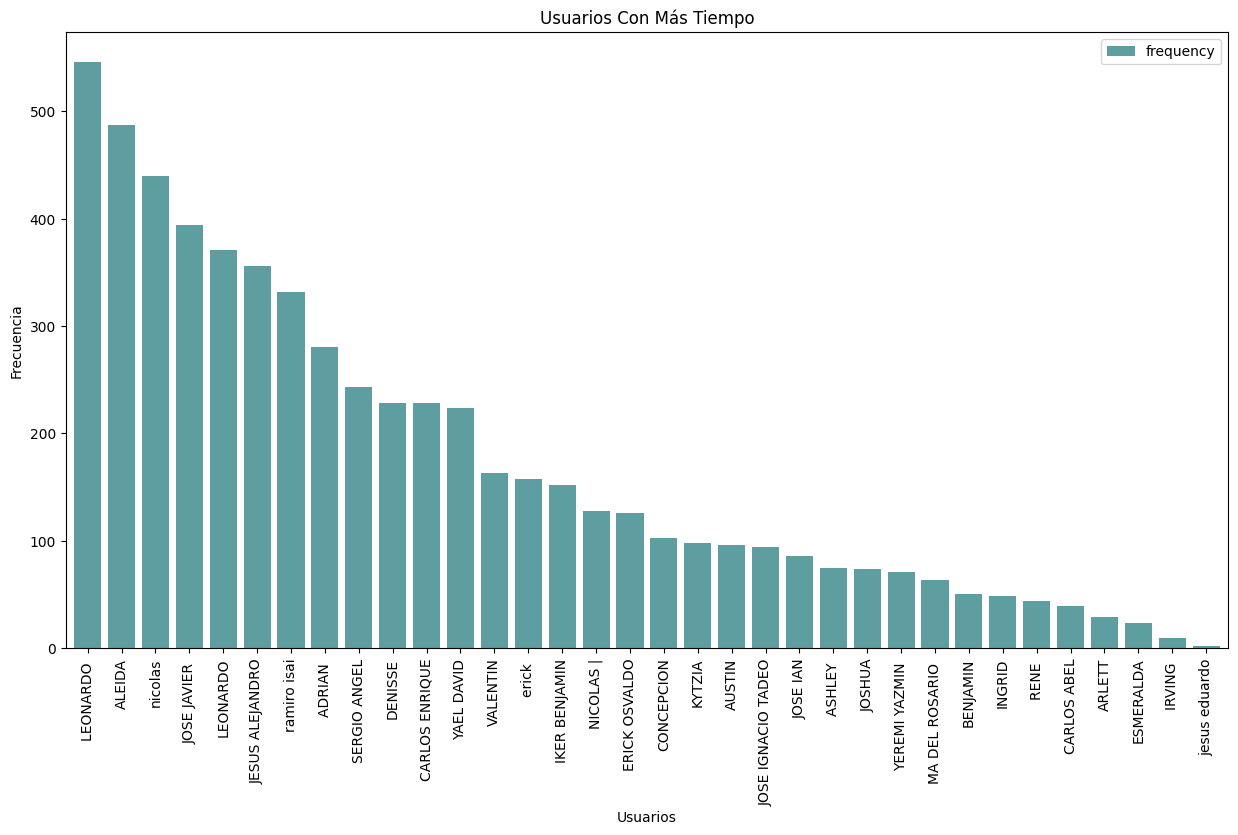

In [8]:
#Usuario:
filtrada_index=analisis_univariado("Usuario")
filtrada_index.plot(kind = 'bar', width=0.8, figsize=(15,8), color= "cadetblue")
plt.title('Usuarios Con Más Tiempo')
plt.xlabel('Usuarios')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

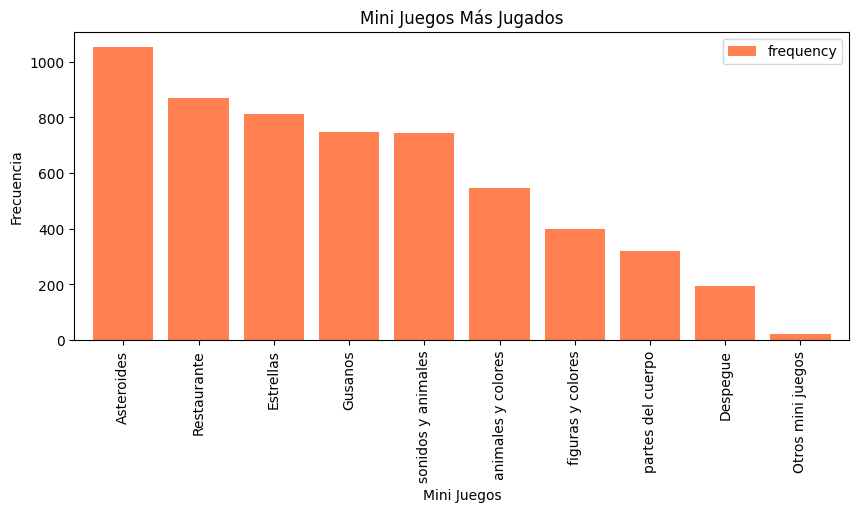

In [9]:
#mini juego:
filtrada_index = analisis_univariado("mini juego")
primeras_filas = filtrada_index.iloc[:-4]
ultimas_filas = filtrada_index.iloc[-4:]
nueva_fila = pd.DataFrame({'frequency': [ultimas_filas['frequency'].sum()]}, index=['Otros mini juegos'])
filtrada_index = pd.concat([primeras_filas, nueva_fila])

filtrada_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "coral")
plt.title('Mini Juegos Más Jugados')
plt.xlabel('Mini Juegos')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Colores Presionados')

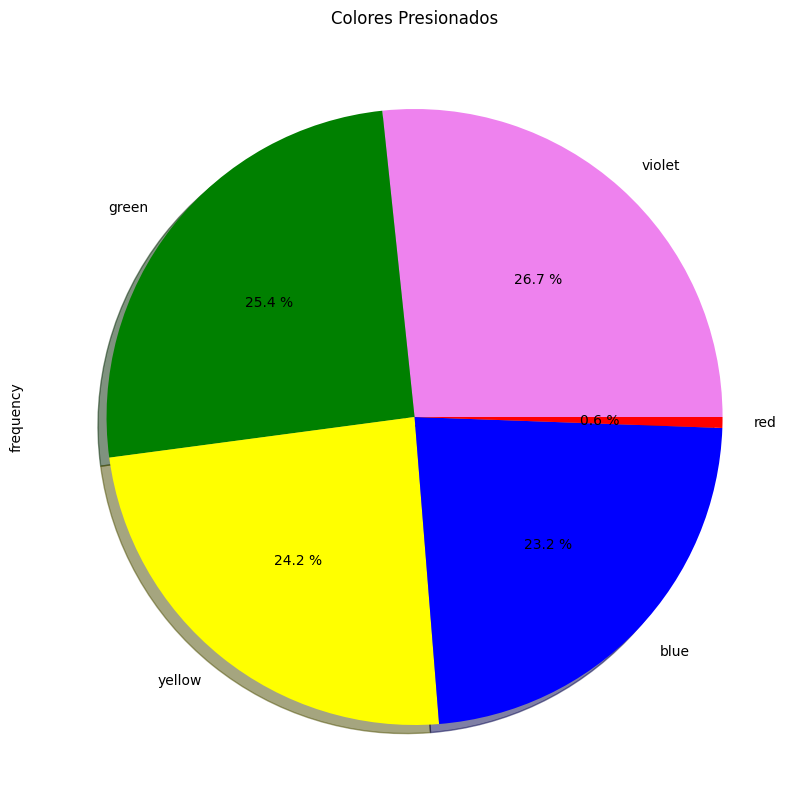

In [10]:
#color presionado:
filtrada_index=analisis_univariado("color presionado")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%", colors=["violet","green","yellow","blue","red"])
plt.title('Colores Presionados')

Text(0.5, 1.0, 'Dificultades Más Practicadas')

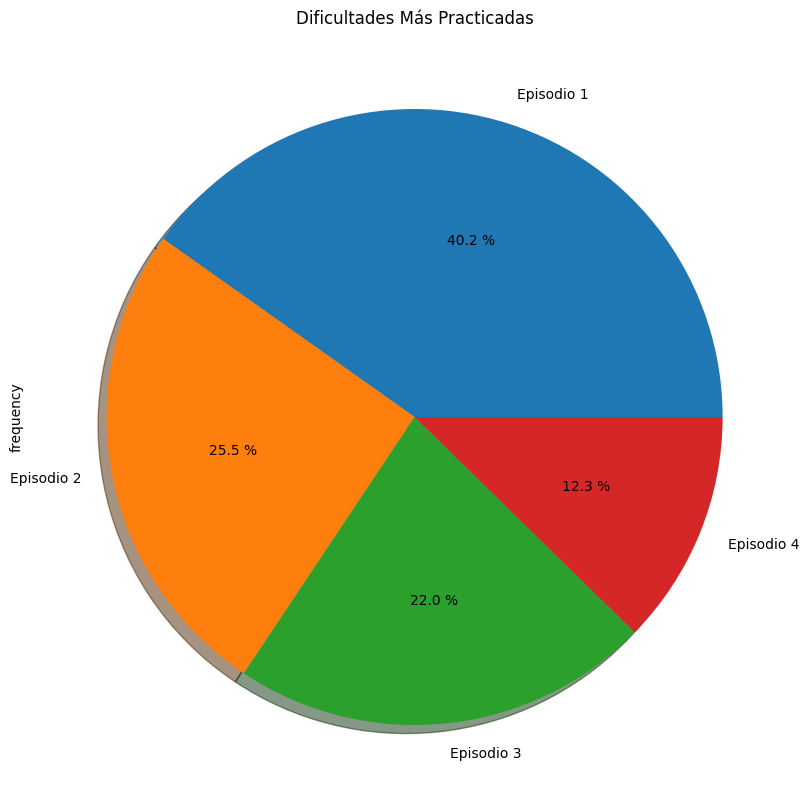

In [11]:
#dificultad:
filtrada_index=analisis_univariado("dificultad")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Dificultades Más Practicadas')

Text(0, 0.5, 'Frecuencia')

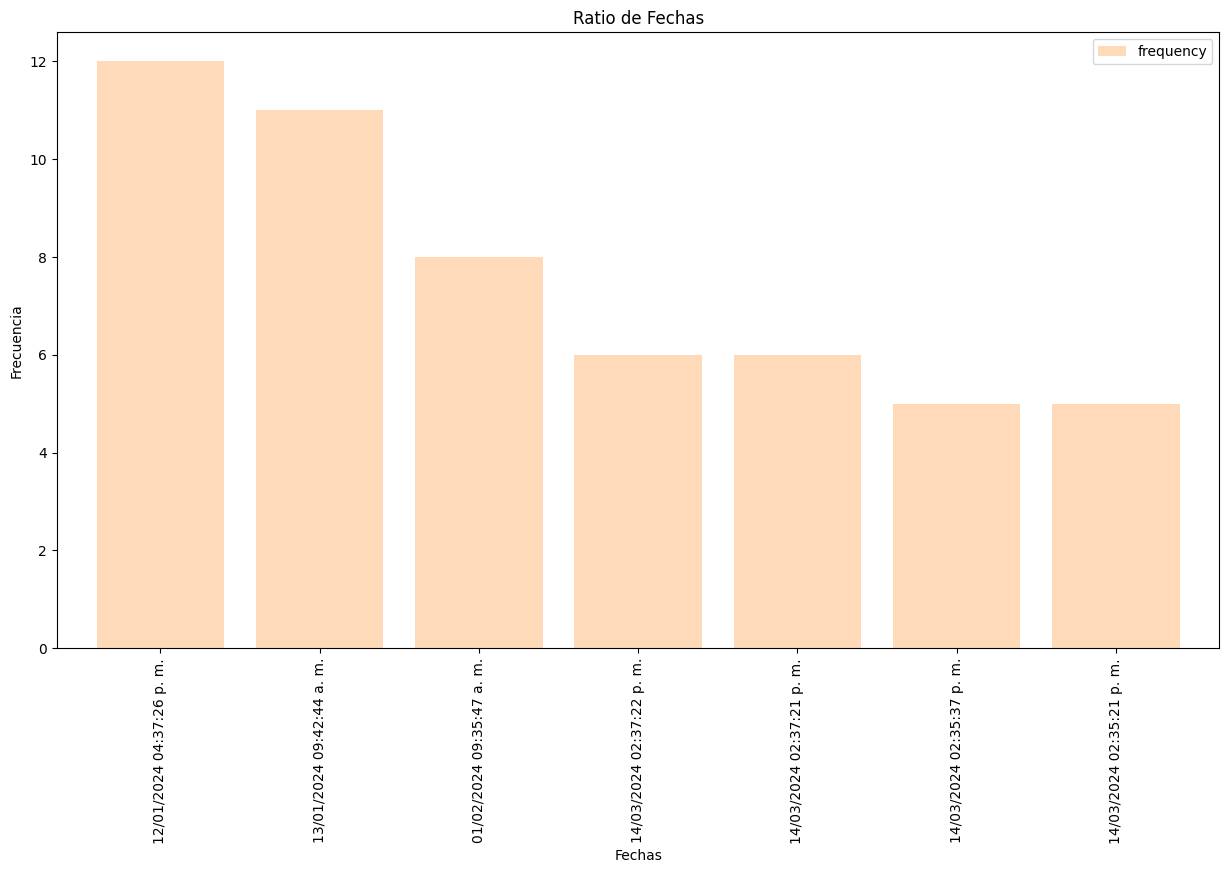

In [12]:
#fecha:
filtrada_index=analisis_univariado("fecha")
filtrada_index.head(7).plot(kind = 'bar', width=0.8, figsize=(15,8), color= "peachpuff")
plt.title('Ratio de Fechas')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Juegos Jugados')

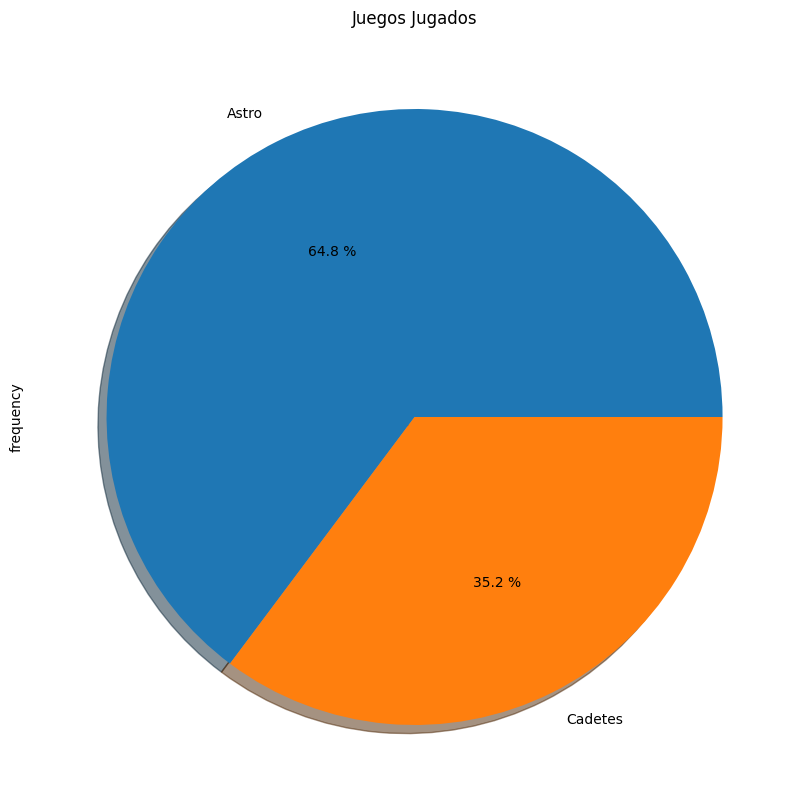

In [13]:
#Juego:
filtrada_index=analisis_univariado("Juego")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Juegos Jugados')

# Categorizar Variables

In [14]:
pd.options.display.max_rows = None

valores_nulos=data.isnull().sum()
valores_nulos

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64

In [15]:
def categorizacion(variable):
    n=5865
    Maxi=data[variable].max()
    Mini=data[variable].min()
    limites= [Mini, Maxi]
    R=Maxi-Mini
    ni= 1+np.log10(n)
    i=R/ni
    return(limites,i)

In [16]:
#tiempo de interacción
info=categorizacion("tiempo de interacción")
info

([0.0, 165.1935], 34.64434034119872)

In [17]:
intervalos=np.linspace(0.0, 165.1935, 6)
intervalos
categorias= ["0-35", "35-70","70-105", "105-140","140-165"]
data['tiempo de interacción']=pd.cut(x= data['tiempo de interacción'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Tiempo de Interacción Más Común')

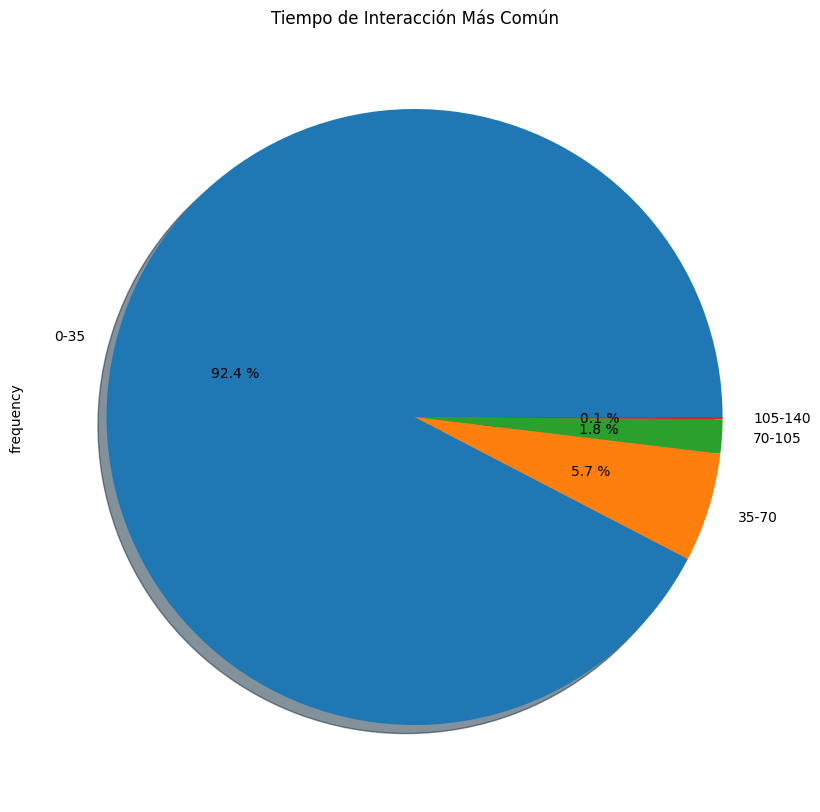

In [18]:
filtrada_index=analisis_univariado("tiempo de interacción")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Tiempo de Interacción Más Común')

In [19]:
info=categorizacion("tiempo de lección")
info

([0.0, 781.3312], 163.86058780761473)

In [20]:
intervalos=np.linspace(0.0, 781.3312, 6)
intervalos
categorias= ["0-164", "164-328","328-492", "492-656","656-782"]
data['tiempo de lección']=pd.cut(x= data['tiempo de lección'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Tiempo de Lección Más Común')

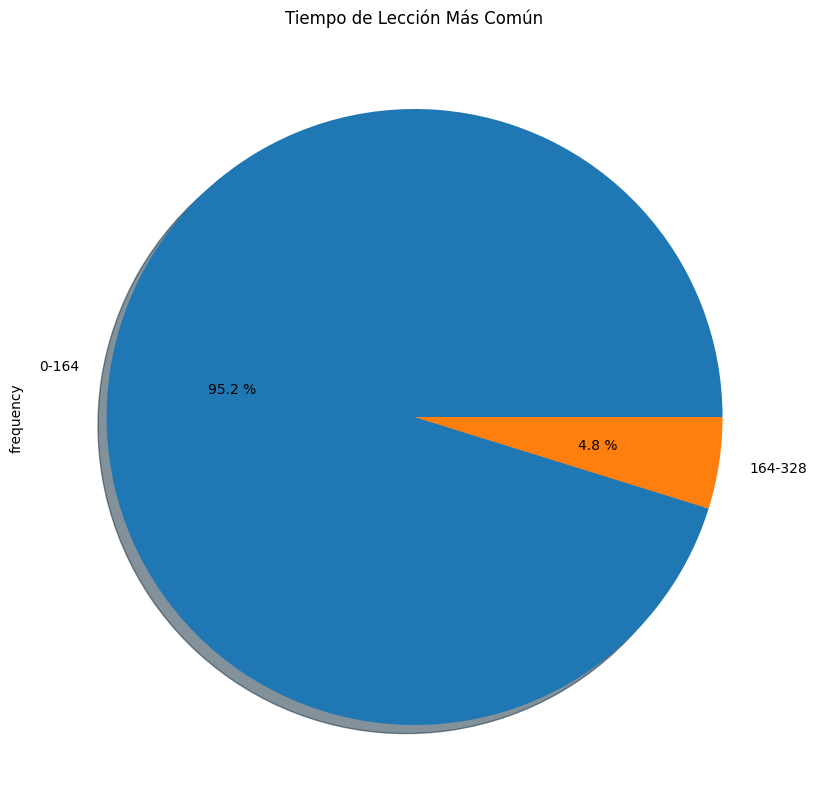

In [21]:
filtrada_index=analisis_univariado("tiempo de lección")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Tiempo de Lección Más Común')

In [22]:
info=categorizacion("tiempo de sesión")
info

([0.0, 2144.452], 449.7339479662595)

In [23]:
intervalos=np.linspace(0.0, 2144.452, 6)
intervalos
categorias= ["0-450","450-900","900-1350", "1350-1800","1800-2145"]
data['tiempo de sesión']=pd.cut(x= data['tiempo de sesión'], bins=intervalos, labels= categorias )

Text(0.5, 1.0, 'Tiempo de Sesión Más Común')

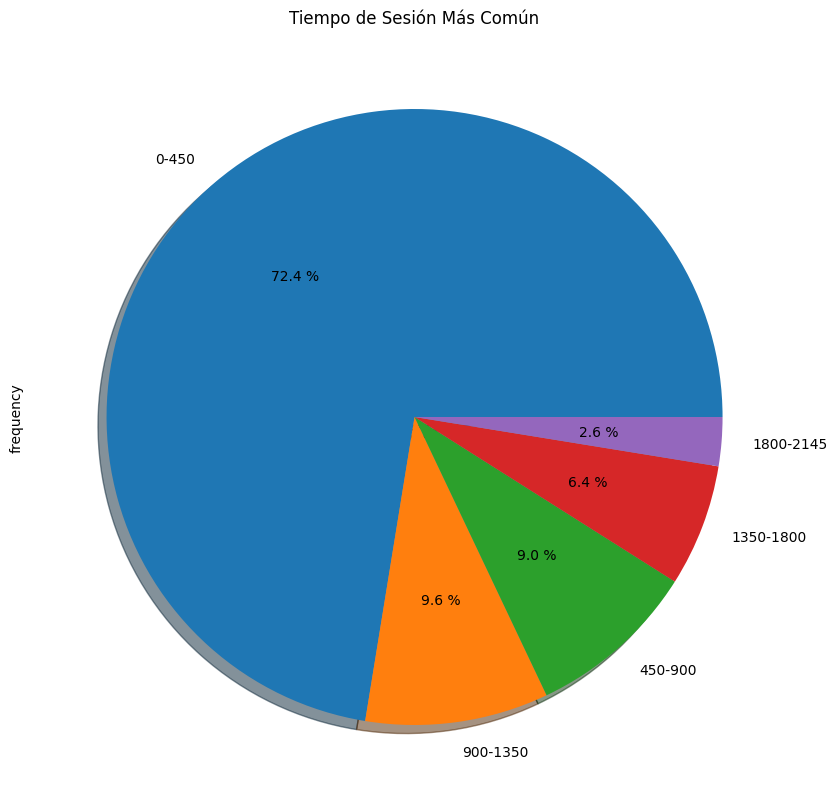

In [24]:
filtrada_index=analisis_univariado("tiempo de sesión")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Tiempo de Sesión Más Común')